# This notebook does data exploration on the Data Extract from FSHA Forms

In [85]:
import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [126]:
filename1 = "C:/Pepsico/NAF-2019 RPA - 09 AUGUST 2019.xlsm"
filename2 = "C:/Pepsico/NAF-2018 RPA - 09 AUGUST 2019.xlsm"
filename3 = "C:/Pepsico/Additional FSHAs.xlsm"
filename4 = "C:/Pepsico/NAF - Additional FSHAs 1 - 13 AUG 2019.xlsm"
#filename = "C:/Pepsico/FSHA RPA - 25 July 2019 - 209Files.xlsm"

# Read the extract file and check number of rows

In [107]:
df1 = pd.read_excel(filename1)
df2 = pd.read_excel(filename2)
df3 = pd.read_excel(filename3)

In [108]:
print(len(df1))
print(len(df2))
print(len(df3))

35
26
39


In [109]:
df =  pd.concat([df1,df2,df3])

In [110]:
#df = pd.read_excel(filename)

In [111]:
print("Number of rows in the extract:",len(df))

Number of rows in the extract: 100


# Check the first 5 rows of the extract, how the data looks like

In [102]:
df.head()

,File Name,projName,accolNumber,PDA_projName,projType,projDesc,formulaNumber,owner,sector,center,...,Table1_Row6_Molluscs,Table1_Row6_Mustard,Table1_Row6_Sesame Seeds,Table1_Row6_Sulphites,Table1_Row1_Moulluscs,Table1_Row2_Moulluscs,Table1_Row3_Moulluscs,Table1_Row4_Moulluscs,Table1_Row5_Moulluscs,Table1_Row6_Moulluscs
0,#46565 FSHA 5.4.1Star Project G3 v2 + FS input...,S-T3-Star-• POL Star Puff (Chrupki) quality –POL,46565,1SKU Star Puffs Onion\n2 SKU Star Puffs Cheese...,Brand Refresh,Star Puffs Cheese & STar Hyper Cheese\nSeasoni...,NaN,Weronika Baranowska,ESSA,Warsaw,...,0.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,#53697 FSHA HT Baguette 4 Cheese UA 2.07.19.xlsm,HT Baguette Four Cheese Flavor,53697,Hrusteam Baguette,Refresh,Launch new seasoning 4 Cheese NL-502-352-9 on ...,NaN,Anna Nikonova,ESSA,Moscow,...,0.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,#57686 FSHA 5.4.1 Red Caviar Azov.xlsm,Lay's Caviar IO 2019 RUS Asov,57686,Lay's Red Caviar,Refresh,Idea is to launch I&O flavour under New Year p...,Not provided,Evgeniy Shklovskiy +79163257848,ESSA,Moscow,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,#57686 FSHA 5.4.1 Red Caviar Kashira.xlsm,Lay's Caviar IO 2019 RUS Kashira,57686,Lay's Red Caviar,Refresh,Idea is to launch I&O flavour under New Year p...,Not provided,Evgeniy Shklovskiy +79163257848,ESSA,Moscow,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,53354-FSHA-In Process 13.12.18.xlsm,Soft and Mild Iberia 2019,53354,Cheetos Palomito,Re Launch,"Re Launch of Cheetos Palomitos, Soft Extruded ...",CP2019,David Labrado 07770646572,ESSA,Beaumont Park,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.columns.values

array(['File Name', 'projName', 'accolNumber', 'PDA_projName', 'projType',
       'projDesc', 'formulaNumber', 'owner', 'sector', 'center',
       'Current TSG Stage', 'FSAssessors', 'FSDate', 'WHTD',
       'manufacSite', 'PlantTrial', 'packMaterial', 'CPD-ProdName',
       'CPD-ProdName-Desc', 'procPlat', 'intrinsicProd', 'preservatives',
       'pH', 'waterActivity', 'packaging', 'otherFSA', 'allergens',
       'prodStorageDist', 'shelfLife', 'TCG', 'foodSafetyProdClaims',
       'cookedOrHeated', 'specificStorage', 'labelingInstructions',
       'mishandled', 'targetMarket', 'fastTrack', 'baseProduct',
       'prodModifications', 'newIngredient', 'approvedPackage',
       'potentialMicrobial', 'crossContactAllergens', 'chokeHazard',
       'operationalAllergen', 'allergensLabeledIMAF',
       'Table1_Row1_Cereals containing Gluten', 'Table1_Row1_Crustaceans',
       'Table1_Row1_Eggs', 'Table1_Row1_Fish', 'Table1_Row1_Milk',
       'Table1_Row1_Nuts', 'Table1_Row1_Peanuts', 'Table1

# Select features based on domain expertise and business inputs

In [93]:
features_df=df[['preservatives', 'pH', 'waterActivity', 'packaging','otherFSA',
            'prodStorageDist', 'foodSafetyProdClaims','targetMarket','allergens','newIngredient','allergensLabeledIMAF']]
#features_df.fillna('NA', inplace=True)

In [94]:
features_df.head()

,preservatives,pH,waterActivity,packaging,otherFSA,prodStorageDist,foodSafetyProdClaims,targetMarket,allergens,newIngredient,allergensLabeledIMAF
0,None,N/A since low moisture food,Low moisture food: water activity <0.3,N/A since low moisture food,None,Ambient; no special requirements,None,no,Various flavors for these brands may have inhe...,No,Milk
1,None,N/A since low moisture food,Low moisture food: water activity <0.3,N/A since low moisture food,None,Ambient; no special requirements,None at launch; Gluten free possible post-launch,no,Various flavors for these brands may have inhe...,No,Milk
2,None,N/A since low moisture food,Low moisture food: water activity <0.3,N/A since low moisture food,None,Ambient; no special requirements,None at launch; Gluten free possible post-launch,no,Various flavors for these brands may have inhe...,No,Milk
3,None,N/A since low moisture food,Low moisture food: water activity <0.3,N/A since low moisture food,None,Ambient; no special requirements,None,no,Various flavors for these brands may have inhe...,No,MILK
4,None,N/A since low moisture food,Low moisture food: water activity <0.3,N/A since low moisture food,None,Ambient; no special requirements,None,no,Various flavors for these brands may have inhe...,No,MILK


In [95]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\09263248\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\09263248\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter
stop = stopwords.words('english')
stop.extend(['nan','ii'])
stop=set(stop)
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    doc = str(doc)
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.

    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': ngram_range,
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    

    plt.figure(figsize=(20, 3))  # width:20, height:3
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()


# Plot frequency distribution of values in the features selected, this gives an idea of what values are there and how frequently they are occuring

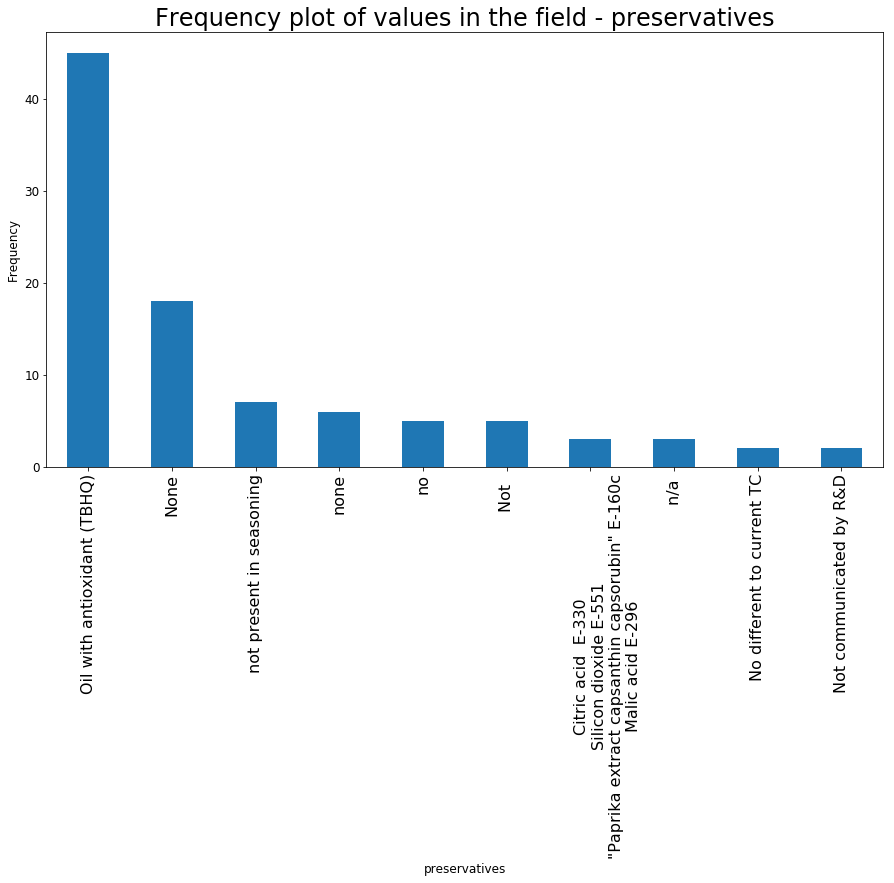

In [53]:
preserv_df = features_df['preservatives'].value_counts()
plt.figure(figsize=(15,8))
plt.title('Frequency plot of values in the field - preservatives',fontname="DejaVu Sans", fontsize=24)
plt.ylabel("Frequency",fontsize=12)
plt.xlabel("preservatives",fontsize=12)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
preserv_df[:10].plot(kind='bar')

This shows 'None' has the highest frequency, and few preservatives like 'Rosemary Extract' 

In [54]:
data_samples = features_df['preservatives']
doc_clean = [clean(doc).split() for doc in data_samples]  
lenDist = []
for i in range(0,len(doc_clean)):
  strLen = len(doc_clean[i])
  lenDist.append(strLen)  

# Plot the length (number of words) distribution of the field 'preservatives'

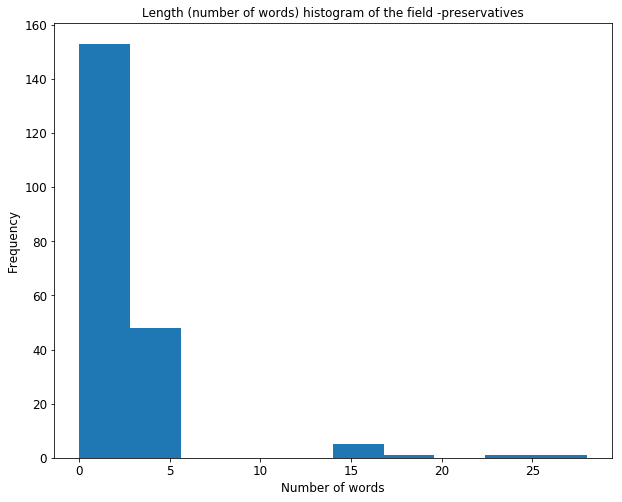

In [55]:
lenDist = np.array(lenDist)
plt.figure(figsize=(10,8))
plt.title("Length (number of words) histogram of the field -preservatives")
plt.hist(lenDist)
plt.xlabel("Number of words",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=12)

This shows there are few values which are having > 12 words in the preservatives field, but mostly all rows are having <= 5 words

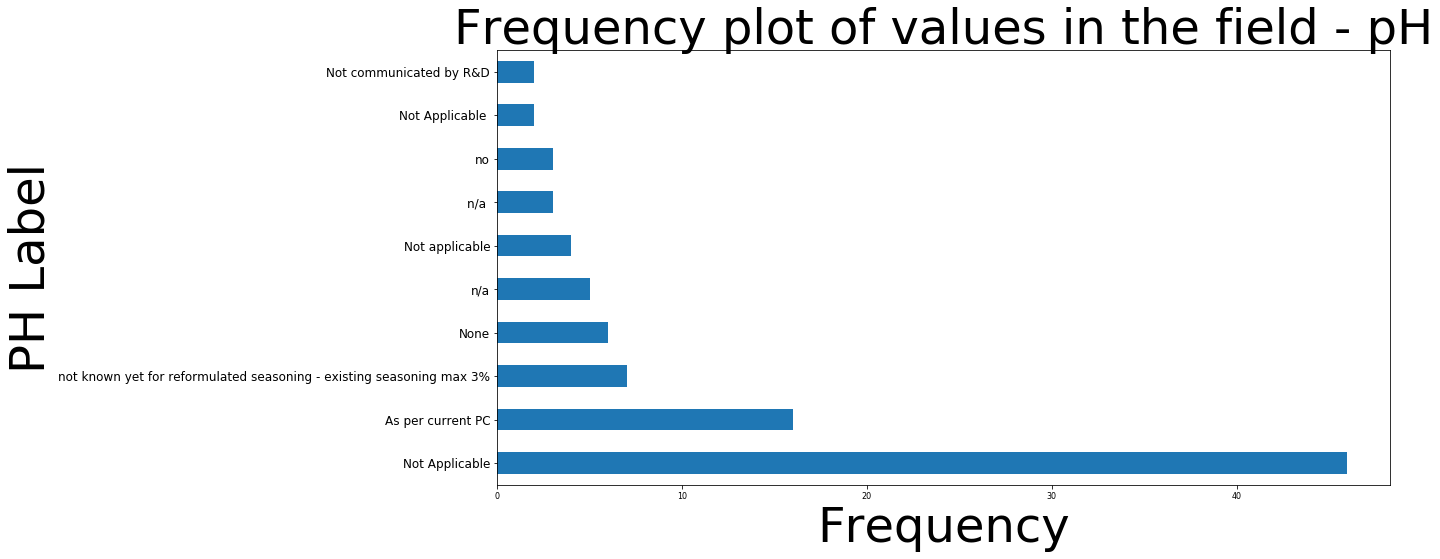

In [56]:
plt.figure(figsize=(16,8))
plt.title('Frequency plot of values in the field - pH',fontname="DejaVu Sans", fontsize=48)
plt.xlabel("Frequency",fontsize=48)
plt.ylabel("PH Label",fontsize=48)
ph_df = features_df['pH'].value_counts()
ph_df[:10].plot(kind='barh')
plt.rc('xtick',labelsize=48)
plt.rc('ytick',labelsize=48)

This shows the value Not Applicable is occuring the most, there are very few valid values in this field

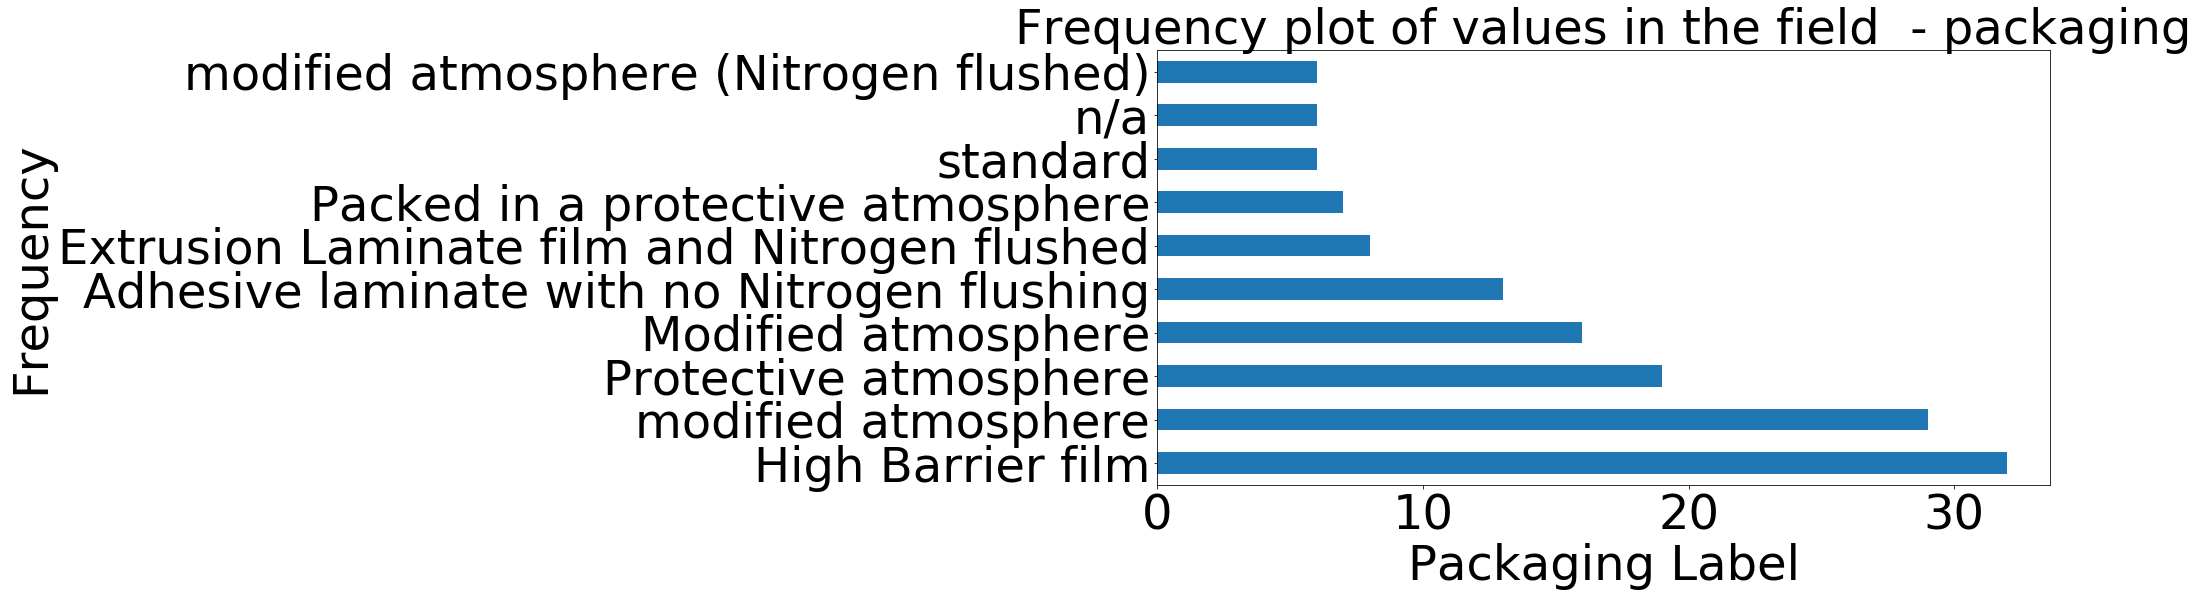

In [58]:
plt.figure(figsize=(16,8))
plt.title('Frequency plot of values in the field  - packaging',fontname="DejaVu Sans", fontsize=48)
plt.ylabel("Frequency",fontsize=48)
plt.xlabel("Packaging Label",fontsize=48)
pack_df = features_df['packaging'].value_counts()
pack_df[:10].plot(kind='barh')
#plt.rc('xtick',labelsize=48)
#plt.rc('ytick',labelsize=48)

This shows 'High Barrier film' and 'modified atmosphere' is the most occuring packaging labels

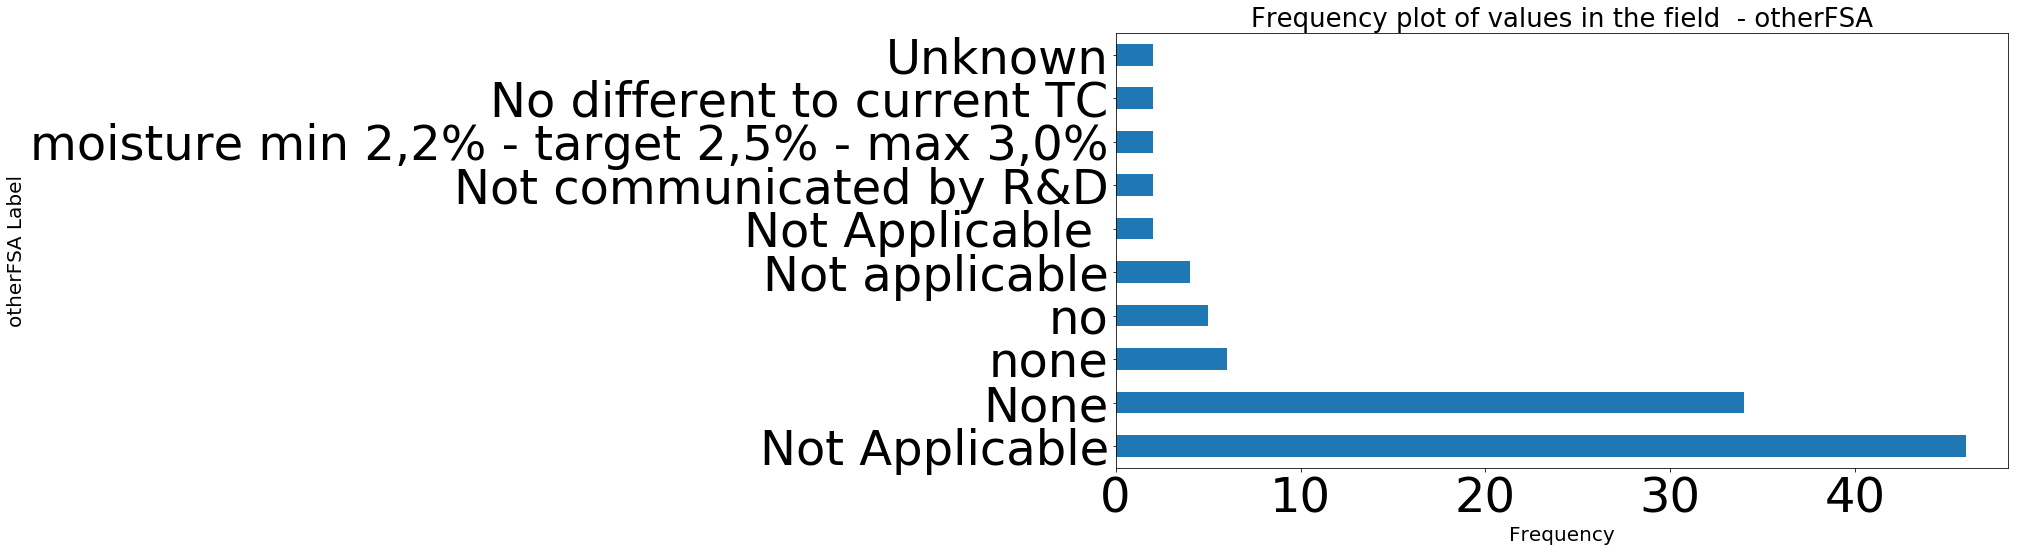

In [59]:
plt.figure(figsize=(16,8))
plt.title('Frequency plot of values in the field  - otherFSA',fontname="DejaVu Sans", fontsize=26)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("otherFSA Label",fontsize=20)
otherFSA_df = features_df['otherFSA'].value_counts()
otherFSA_df[:10].plot(kind='barh')   
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=12)

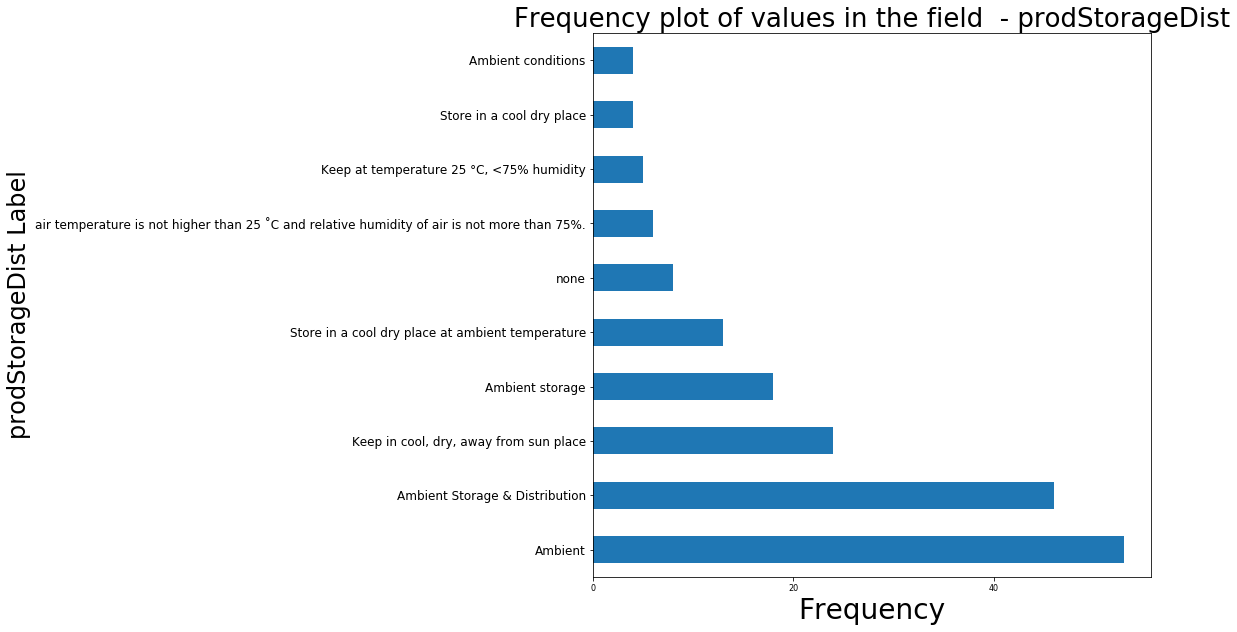

In [60]:
plt.figure(figsize=(10,10))
plt.title('Frequency plot of values in the field  - prodStorageDist',fontname="DejaVu Sans", fontsize=26)
plt.xlabel("Frequency", fontsize = 28)
plt.ylabel("prodStorageDist Label",fontsize = 24)
prodStorage_df = features_df['prodStorageDist'].value_counts()
prodStorage_df[:10].plot(kind='barh')
plt.rc('xtick',labelsize=32)
plt.rc('ytick',labelsize=26)

This shows ambient storage is most common

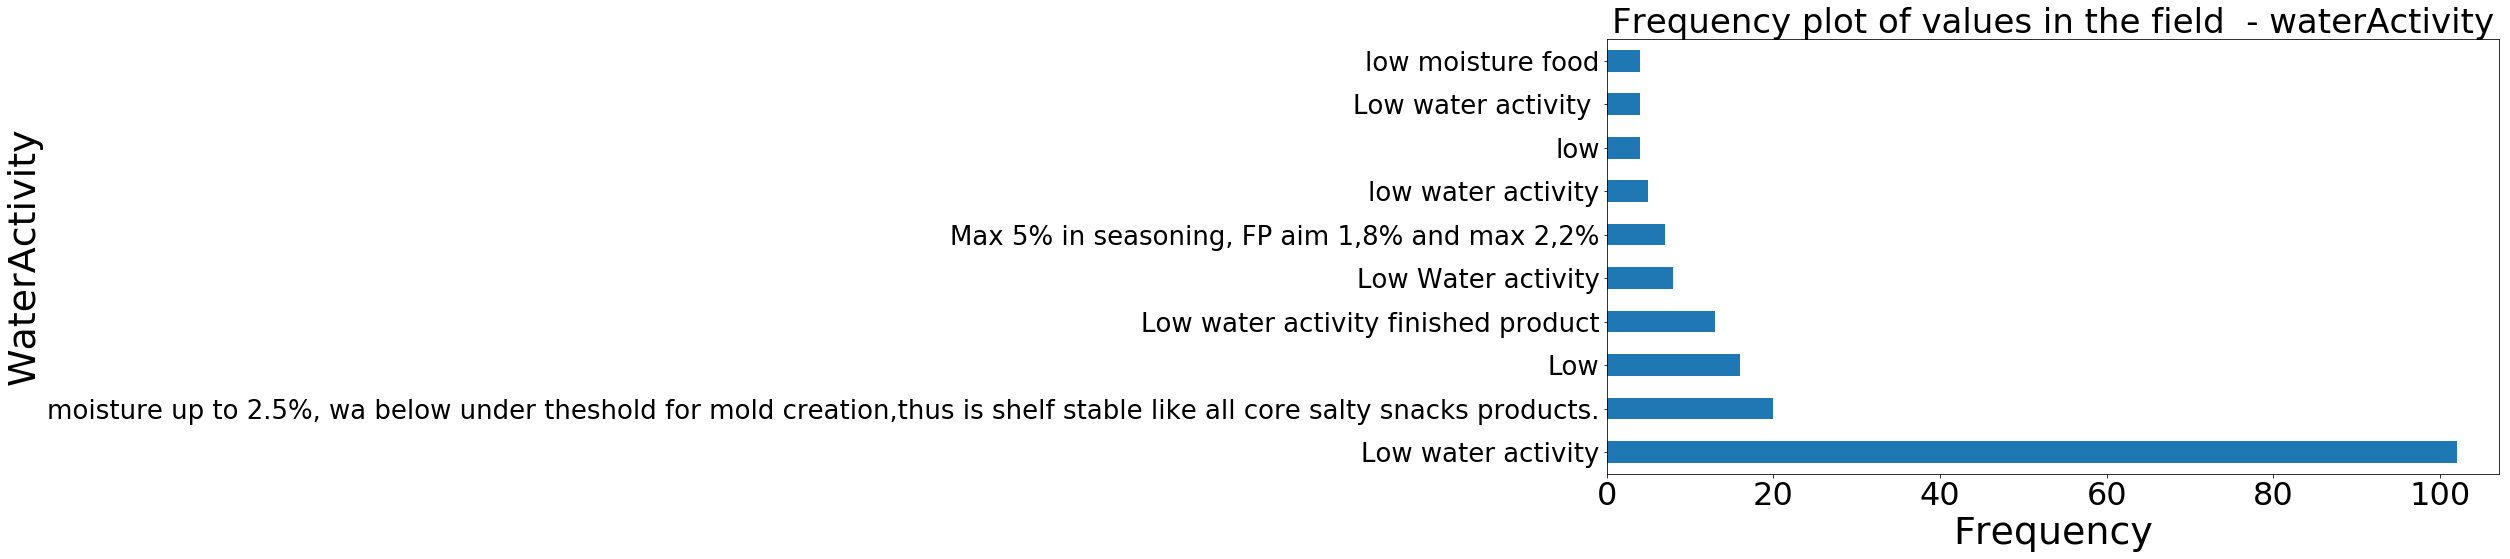

In [61]:
plt.figure(figsize=(16,8))
plt.title('Frequency plot of values in the field  - waterActivity',fontname="DejaVu Sans", fontsize=34)
plt.xlabel("Frequency",fontsize = 38)
plt.ylabel("WaterActivity",fontsize = 38)
waterAct_df = features_df['waterActivity'].value_counts()
waterAct_df[:10].plot(kind='barh') 
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=28)

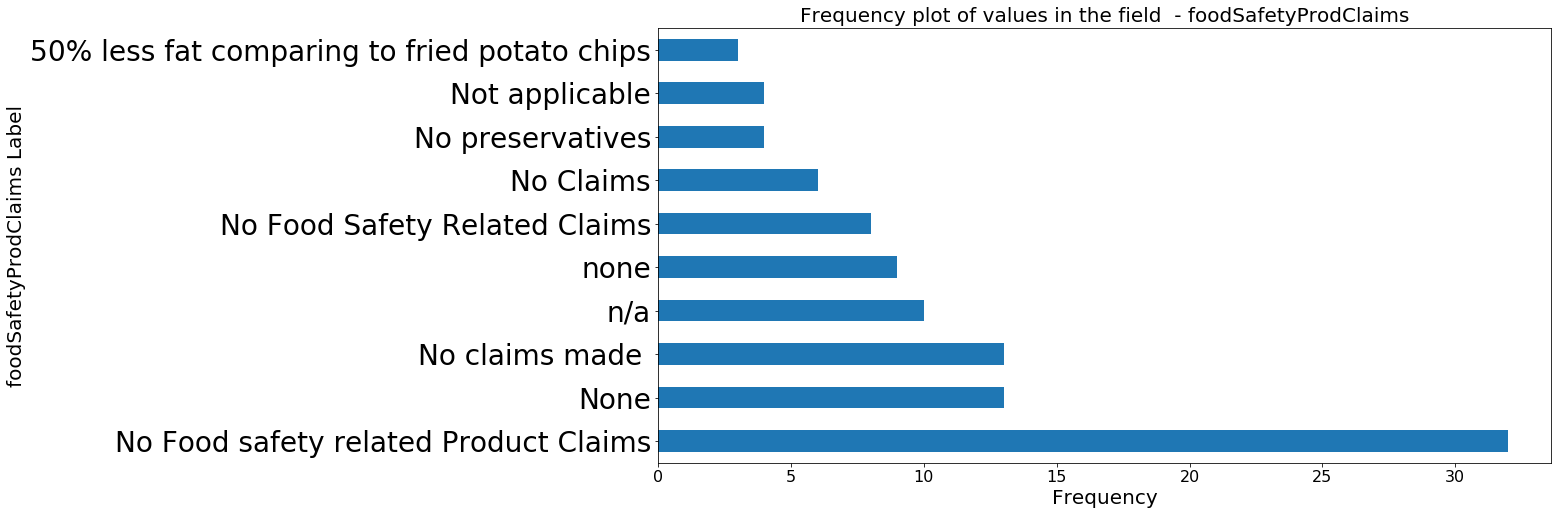

In [62]:
plt.figure(figsize=(16,8))
plt.title('Frequency plot of values in the field  - foodSafetyProdClaims',fontname="DejaVu Sans", fontsize=20)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("foodSafetyProdClaims Label",fontsize=20)
foodSafety_df = features_df['foodSafetyProdClaims'].value_counts()
foodSafety_df[:10].plot(kind='barh')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=12)

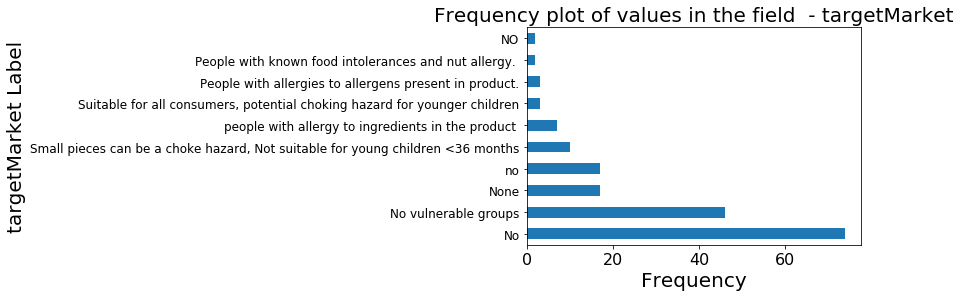

In [63]:
plt.title('Frequency plot of values in the field  - targetMarket',fontname="DejaVu Sans", fontsize=20)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("targetMarket Label",fontsize=20)
targetMkt_df = features_df['targetMarket'].value_counts()
targetMkt_df[:10].plot(kind='barh')

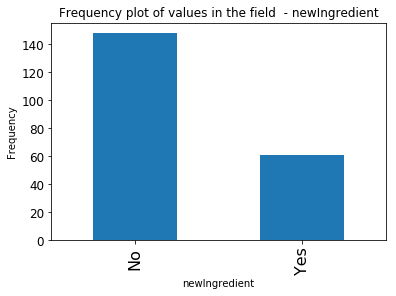

In [64]:
plt.title('Frequency plot of values in the field  - newIngredient')
plt.ylabel("Frequency")
plt.xlabel("newIngredient")
features_df['newIngredient'].value_counts().plot(kind='bar')

In [65]:
data_samples = features_df['allergens']
doc_clean = [clean(doc).split() for doc in data_samples]  
lenDist = []
for i in range(0,len(doc_clean)):
  strLen = len(doc_clean[i])
  lenDist.append(strLen)  

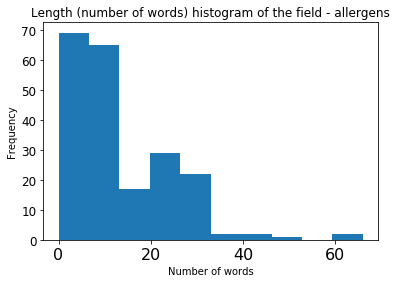

In [66]:
lenDist = np.array(lenDist)
plt.title("Length (number of words) histogram of the field - allergens")
plt.hist(lenDist)
plt.xlabel("Number of words")
plt.ylabel("Frequency")

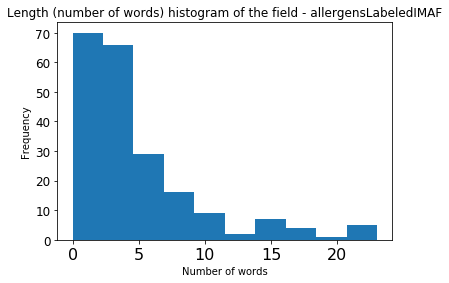

In [67]:
data_samples = features_df['allergensLabeledIMAF']
doc_clean = [clean(doc).split() for doc in data_samples]  
lenDist = []
for i in range(0,len(doc_clean)):
  strLen = len(doc_clean[i])
  lenDist.append(strLen)  
lenDist = np.array(lenDist)
plt.title("Length (number of words) histogram of the field - allergensLabeledIMAF")
plt.hist(lenDist)
plt.xlabel("Number of words")
plt.ylabel("Frequency")

In [68]:
norm_doc = [clean(doc) for doc in data_samples]

# Plot of most frequent bi-grams from the AllergensLabeledIMAF field

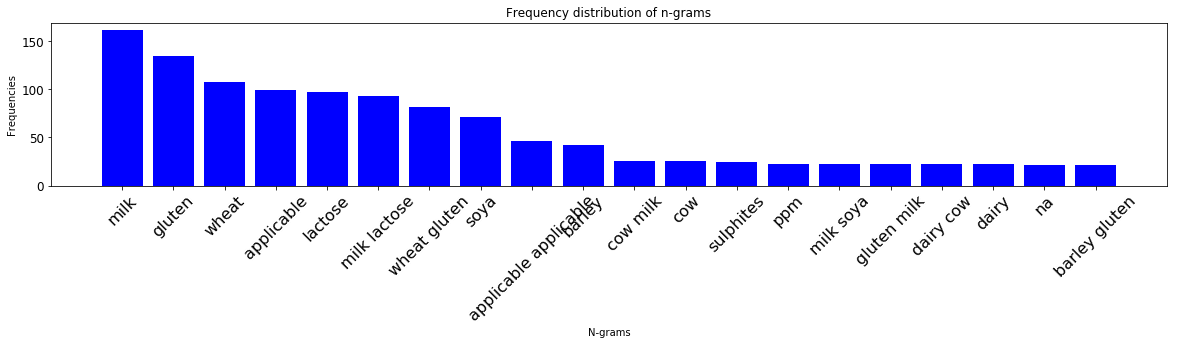

In [69]:
plot_frequency_distribution_of_ngrams(norm_doc,ngram_range=(1, 2),num_ngrams=20)

# Plot of most frequent bi-grams from the Allergens field in PDAF

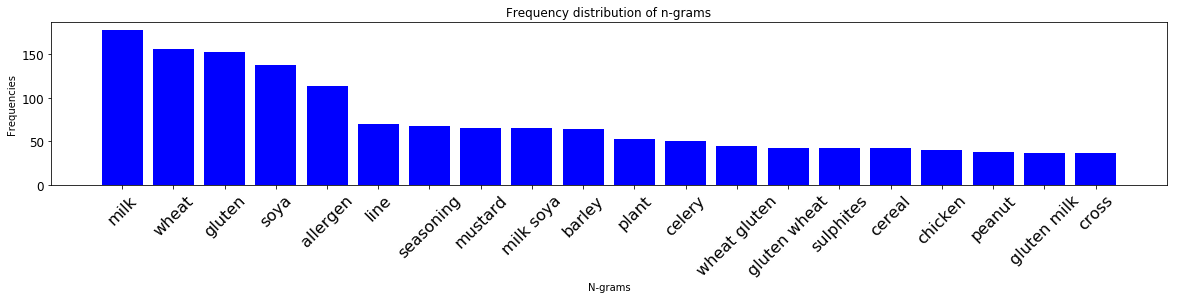

In [70]:
data_samples = features_df['allergens']
norm_doc = [clean(doc) for doc in data_samples]
plot_frequency_distribution_of_ngrams(norm_doc,ngram_range=(1, 2),num_ngrams=20)

# WordCloud from the Allergens field in PDAF

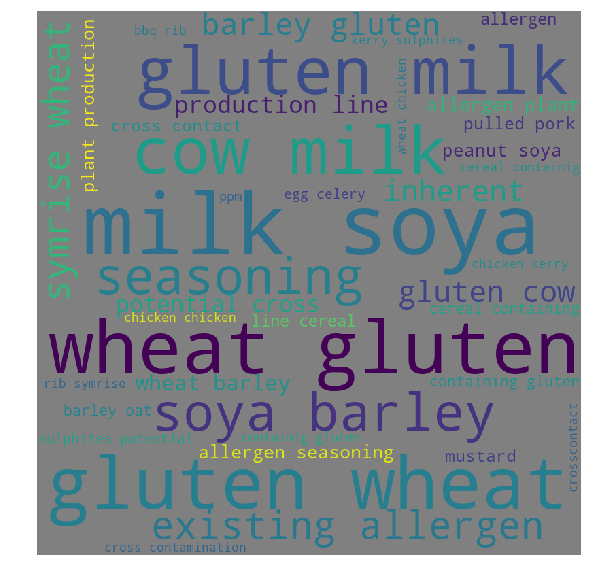

In [71]:
from wordcloud import WordCloud, STOPWORDS
data_samples = features_df['allergens']
norm_doc = [clean(doc) for doc in data_samples]
doc_clean1 = clean(' '.join(norm_doc)) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='gray',max_words = 40).generate(doc_clean1)
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

# WordCloud from the AllergensToBeLabelled field in IMAF

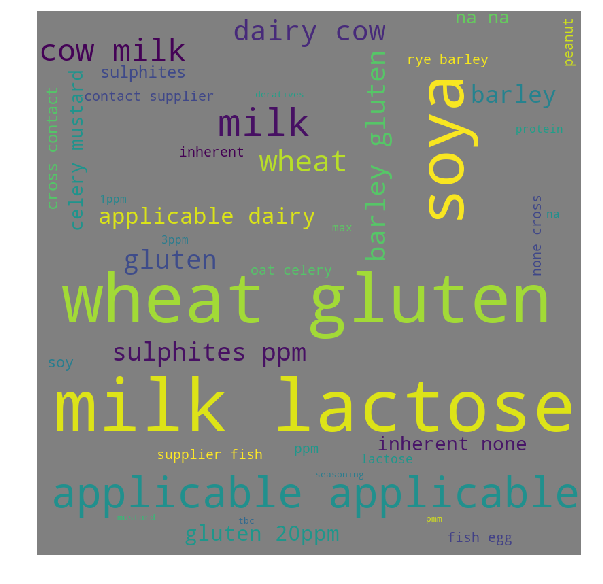

In [72]:
data_samples = features_df['allergensLabeledIMAF']
norm_doc = [clean(doc) for doc in data_samples]
doc_clean1 = clean(' '.join(norm_doc)) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='gray',max_words = 40).generate(doc_clean1)
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

# Plot of most frequent bi-grams from the preservatives field

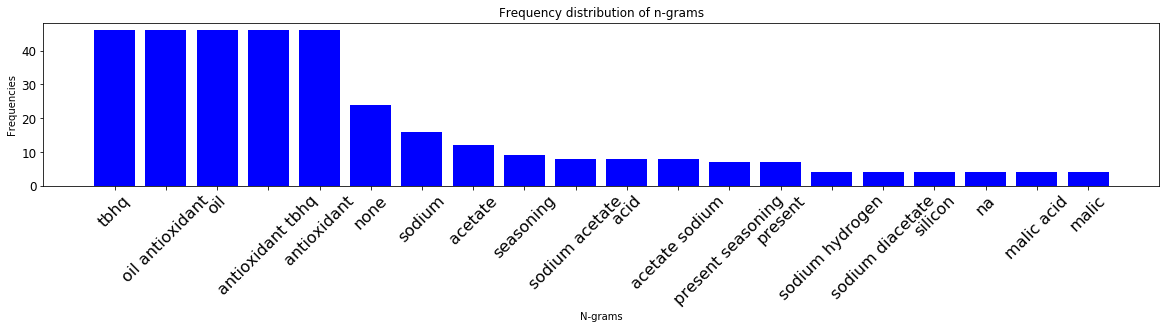

In [73]:
data_samples = features_df['preservatives']
norm_doc = [clean(doc) for doc in data_samples]
plot_frequency_distribution_of_ngrams(norm_doc,ngram_range=(1, 2),num_ngrams=20)

In [71]:
Packaging_df = features_df['packaging'].value_counts()
Packaging_df.to_csv("C:/Pepsico/Packaging.csv")

waterActivity_df = features_df['waterActivity'].value_counts()
waterActivity_df.to_csv("C:/Pepsico/WaterActivity.csv")

preservatives_df = features_df['preservatives'].value_counts()
preservatives_df.to_csv("C:/Pepsico/preservatives.csv")

pH_df = features_df['pH'].value_counts()
pH_df.to_csv("C:/Pepsico/pH.csv")

otherFSA_df = features_df['otherFSA'].value_counts()
otherFSA_df.to_csv("C:/Pepsico/otherFSA.csv")

prodStorageDist_df = features_df['prodStorageDist'].value_counts()
prodStorageDist_df.to_csv("C:/Pepsico/prodStorageDist.csv")

foodSafetyProdClaims_df = features_df['foodSafetyProdClaims'].value_counts()
foodSafetyProdClaims_df.to_csv("C:/Pepsico/foodSafetyProdClaims.csv")

targetMarket_df = features_df['targetMarket'].value_counts()
targetMarket_df.to_csv("C:/Pepsico/targetMarket.csv")

newIngredient_df = features_df['newIngredient'].value_counts()
newIngredient_df.to_csv("C:/Pepsico/newIngredient.csv")

# Target Distribution plots - shows unbalanced target data in all cases

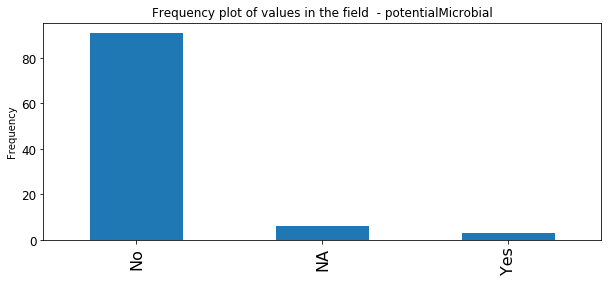

In [115]:
df['potentialMicrobial'].fillna('NA', inplace=True)
plt.figure(figsize=(10,4))
plt.title('Frequency plot of values in the field  - potentialMicrobial')
plt.ylabel('Frequency')
df.potentialMicrobial.value_counts().plot(kind='bar');

In [116]:
df.potentialMicrobial.value_counts()

No     91
NA      6
Yes     3
Name: potentialMicrobial, dtype: int64

In [117]:
df[(df['potentialMicrobial']=="Yes") |(df['potentialMicrobial']=="NA") ][["File Name","potentialMicrobial"]].values

array([['Copy of Copy of Copy of FSHA Smart50 Sea Salt Perry 2019.xlsm',
        'NA'],
       ['Copy of Nut Harvest Spicy Pistachios FSHA-in-Progress.xlsm',
        'NA'],
       ['Tostitos K-12 Mild Salsa - FSHA and HTD 3-21-19.xlsm', 'Yes'],
       ['Copy of FSHA  HTD - Poppables with Real Sweet Potato - DRAFT.xlsm',
        'NA'],
       ['Copy of FSHA and HTD - Cheetos Pepper Puff LTO - DRAFT.xlsm',
        'NA'],
       ['Copy of Harvest Grandmas. Chocolate Chip Big Cookie  FSHA in process 2018.Traditional Baking Copacker.xlsm',
        'NA'],
       ['Copy of Mexican Style Corn Dip-FSHA and HTD-In process.xlsm',
        'Yes'],
       ['Copy of OTEP Roasted Red Pepper Dip_FSHA and HTD_042518.xlsm',
        'NA'],
       ['Southwest Cheese and Corn Dip FSHA and HTD.xlsm', 'Yes']],
      dtype=object)

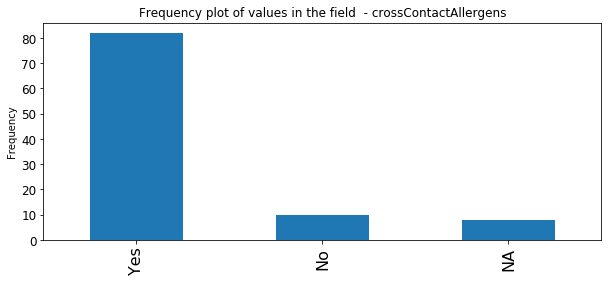

In [118]:
df['crossContactAllergens'].fillna('NA', inplace=True)
plt.figure(figsize=(10,4))
plt.title('Frequency plot of values in the field  - crossContactAllergens')
plt.ylabel('Frequency')
df.crossContactAllergens.value_counts().plot(kind='bar');

In [119]:
df.crossContactAllergens.value_counts()

Yes    82
No     10
NA      8
Name: crossContactAllergens, dtype: int64

In [120]:
df[(df['crossContactAllergens']=="No") | (df['crossContactAllergens']=="NA") ][["File Name","crossContactAllergens"]].values

array([['Copy of Copy of Copy of FSHA Smart50 Sea Salt Perry 2019.xlsm',
        'NA'],
       ['Copy of Nut Harvest Spicy Pistachios FSHA-in-Progress.xlsm',
        'NA'],
       ['Copy of Tostitos Salsa Verde_draft 6.11.19.xlsm', 'No'],
       ['Tostitos K-12 Mild Salsa - FSHA and HTD 3-21-19.xlsm', 'No'],
       ['Doritos Blaze 26163-FSHA and HTD-Final.xlsm', 'NA'],
       ['FSHA_Doritos Blaze_Fast Track_Final.xlsm', 'NA'],
       ["Wavy Lay's Salt & Pepper Combined FSHA Form-Fast Track - Final.xlsm",
        'No'],
       ['Copy of Copy of SunGold Sunflower and Pumpkin-FSHA-Final.xlsm',
        'No'],
       ['Copy of Doritos 3D Crunch 2020-FSHA and HTD-In Process.xlsm',
        'No'],
       ['Copy of FSHA  HTD - Poppables with Real Sweet Potato - DRAFT.xlsm',
        'NA'],
       ['Copy of FSHA and HTD - Cheetos Pepper Puff LTO - DRAFT.xlsm',
        'NA'],
       ['Copy of Harvest Grandmas. Chocolate Chip Big Cookie  FSHA in process 2018.Traditional Baking Copacker.xlsm',
     

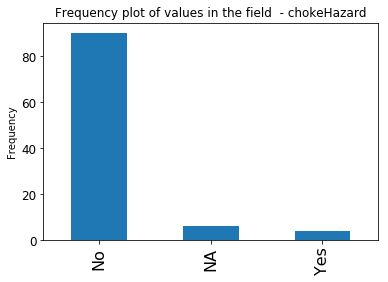

In [121]:
df['chokeHazard'].fillna('NA', inplace=True)
plt.title('Frequency plot of values in the field  - chokeHazard')
plt.ylabel('Frequency')
df.chokeHazard.value_counts().plot(kind='bar');

In [122]:
df[(df['chokeHazard']=="Yes") | (df['chokeHazard']=="NA") ][["File Name","chokeHazard"]].values

array([['Copy of Copy of Copy of FSHA Smart50 Sea Salt Perry 2019.xlsm',
        'NA'],
       ['Copy of Nut Harvest Alternate Oil Final FSHA and HTD Template.xlsm',
        'Yes'],
       ['Copy of Nut Harvest Spicy Pistachios FSHA-in-Progress.xlsm',
        'NA'],
       ['Copy of FSHA  HTD - Poppables with Real Sweet Potato - DRAFT.xlsm',
        'NA'],
       ['Copy of FSHA and HTD - Cheetos Pepper Puff LTO - DRAFT.xlsm',
        'NA'],
       ['Copy of Harvest Grandmas. Chocolate Chip Big Cookie  FSHA in process 2018.Traditional Baking Copacker.xlsm',
        'NA'],
       ['Copy of OTEP Roasted Red Pepper Dip_FSHA and HTD_042518.xlsm',
        'NA'],
       ['Copy of Smartfood Delights Organic -FSHA-Final.xlsm', 'Yes'],
       ['Munchies Unsalted Peanuts 48873-FSHA and HTD-Final122717.xlsm',
        'Yes'],
       ['Nut Harvest Seasoned Nuts PET-46849-FSHA and HTD-Final021618.xlsm',
        'Yes']], dtype=object)

In [123]:
df.chokeHazard.value_counts()

No     90
NA      6
Yes     4
Name: chokeHazard, dtype: int64

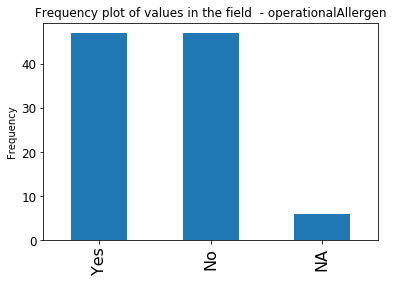

In [124]:
df['operationalAllergen'].fillna('NA', inplace=True)
plt.title('Frequency plot of values in the field  - operationalAllergen')
plt.ylabel('Frequency')
df.operationalAllergen.value_counts().plot(kind='bar')

In [125]:
df.operationalAllergen.value_counts()

Yes    47
No     47
NA      6
Name: operationalAllergen, dtype: int64